# Visualizing with Slideflow

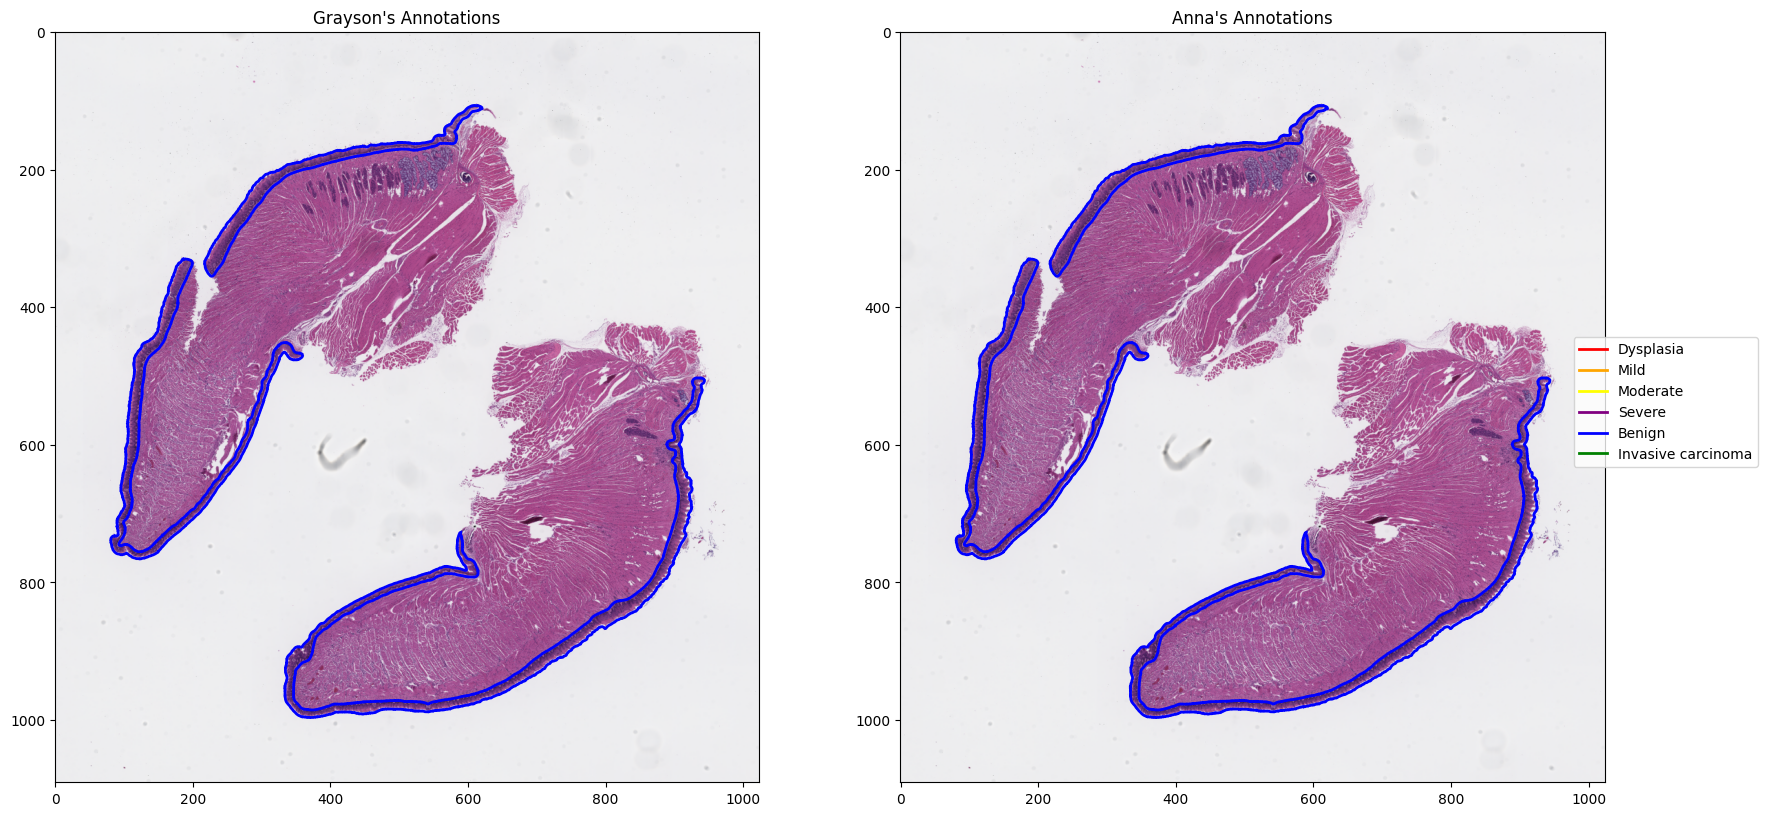

In [9]:
import os
import slideflow as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon

# Create WSI objects for slide AF110F with both pathologists' annotations
wsi_grayson = sf.WSI(
    path="/home/stanna/labshare/SLIDES/PDCD10/TAM_then_4NQO/AF110F.svs",
    tile_px=256,
    tile_um=128,
    rois="/home/stanna/labshare/PROJECTS/PDCD10/rois/grayson/AF110F.csv"
)

wsi_anna = sf.WSI(
    path="/home/stanna/labshare/SLIDES/PDCD10/TAM_then_4NQO/AF110F.svs",
    tile_px=256,
    tile_um=128,
    rois="/home/stanna/labshare/PROJECTS/PDCD10/rois/anna/AF110F.csv"
)

# Generate thumbnails without ROI overlays
thumb_grayson = wsi_grayson.thumb(width=1024, rois=False)
thumb_anna = wsi_anna.thumb(width=1024, rois=False)

# Calculate scaling factor for coordinate conversion
orig_width, _ = wsi_grayson.dimensions
scale = thumb_grayson.width / orig_width

# Define color mapping for different annotation types
color_map = {
    'dysplasia': 'red',
    'mild': 'orange',
    'moderate': 'yellow',
    'severe': 'purple',
    "benign": "blue",
    "invasive carcinoma": "green"
}

def overlay_rois(ax, wsi_obj):
    """Overlay ROI polygons on the given axis with appropriate colors."""
    for roi in wsi_obj.rois:
        # Handle both Polygon and MultiPolygon geometries
        if roi.poly.geom_type == "Polygon":
            polygons = [roi.poly]
        elif roi.poly.geom_type == "MultiPolygon":
            polygons = list(roi.poly.geoms)
        else:
            print(f"Unknown geometry type: {roi.poly.geom_type} for ROI with label {roi.label}")
            continue
        
        label = roi.label.lower() if roi.label else "unknown"
        color = color_map.get(label, "pink")

        for poly in polygons:
            # Scale coordinates to match thumbnail dimensions
            poly_coords = np.array(poly.exterior.coords) * scale
            
            # Create and add polygon patch
            patch = MplPolygon(poly_coords, closed=True, edgecolor=color, fill=False, linewidth=2)
            ax.add_patch(patch)

# Create side-by-side comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Display Grayson's annotations
ax1.imshow(thumb_grayson)
overlay_rois(ax1, wsi_grayson)
ax1.set_title("Grayson's Annotations")

# Display Anna's annotations
ax2.imshow(thumb_anna)
overlay_rois(ax2, wsi_anna)
ax2.set_title("Anna's Annotations")

# Add legend
legend_elements = [plt.Line2D([0], [0], color=color, label=label.capitalize(), linewidth=2)
                  for label, color in color_map.items()]
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(0.98, 0.5))

plt.show()


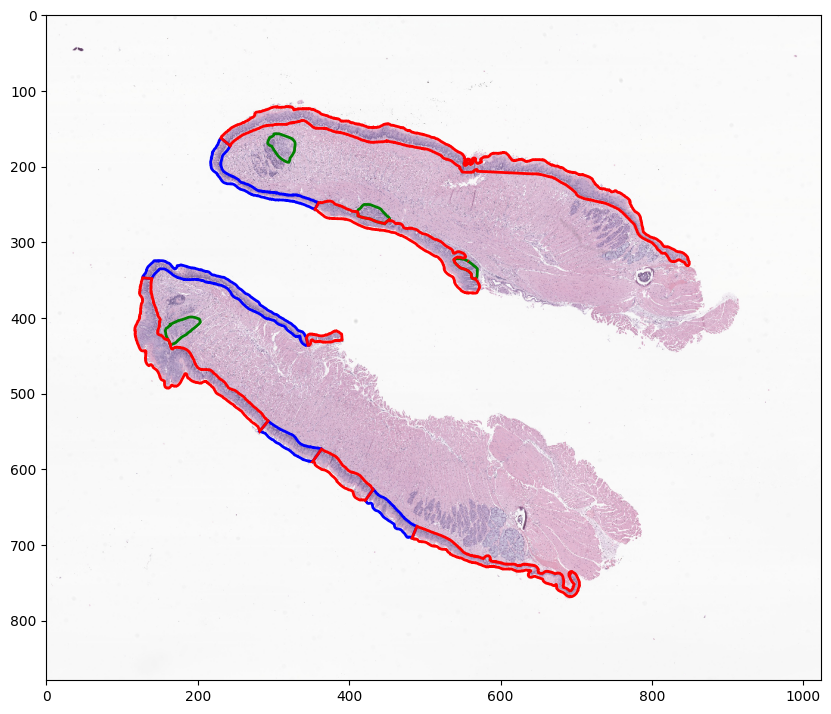

In [15]:
#visualize the slide thumbnail and rois for Anna
wsi_anna = sf.WSI(
    path = "/home/stanna/labshare/SLIDES/PDCD10/4NQO_then_TAM/AG985F.svs",
    tile_px = 256,
    tile_um = 128,
    rois = "/home/stanna/Cancer_Project_2025/Anna/exp2/AG985F.csv"
)


#generate the thumbnails
thumb_anna = wsi_anna.thumb(width=1024, rois=False)

# Calculate scaling factor for coordinate conversion
orig_width, _ = wsi_anna.dimensions
scale = thumb_anna.width / orig_width

# Define color mapping for different annotation types
color_map = {
    'dysplasia': 'red',
    'mild': 'orange',
    'moderate': 'yellow',
    'severe': 'purple',
    "benign": "blue",
    "invasive carcinoma": "green"
}

def overlay_rois(ax, wsi_obj):
    """Overlay ROI polygons on the given axis with appropriate colors."""
    for roi in wsi_obj.rois:
        # Handle both Polygon and MultiPolygon geometries
        if roi.poly.geom_type == "Polygon":
            polygons = [roi.poly]
        elif roi.poly.geom_type == "MultiPolygon":
            polygons = list(roi.poly.geoms)
        else:
            print(f"Unknown geometry type: {roi.poly.geom_type} for ROI with label {roi.label}")
            continue
        
        label = roi.label.lower() if roi.label else "unknown"
        color = color_map.get(label, "pink")

        for poly in polygons:
            # Scale coordinates to match thumbnail dimensions
            poly_coords = np.array(poly.exterior.coords) * scale
            
            # Create and add polygon patch
            patch = MplPolygon(poly_coords, closed=True, edgecolor=color, fill=False, linewidth=2)
            ax.add_patch(patch)

#create the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumb_anna)
overlay_rois(ax, wsi_anna)
plt.show()




In [5]:
# Check geometry types for carcinoma annotations
import os
import slideflow as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon

# Load WSI object for slide AH215M
wsi_anna = sf.WSI(
    path="/home/stanna/labshare/SLIDES/PDCD10/4NQO_then_TAM/AH215M.svs",
    tile_px=256,
    tile_um=128,
    rois="/home/stanna/Cancer_Project_2025/Anna/rois_csvs/AH215M.csv"
)

# Check geometry type and area for carcinoma ROIs
for roi in wsi_anna.rois:
    if roi.label == "Invasive carcinoma" or roi.label == "Carcinoma":
        print(roi.poly.geom_type)
        print(roi.poly.area)
        

    

Polygon
85510078.0
Polygon
63427255.5
Polygon
11079525.5
Polygon
8482820.5


In [8]:
# Check geometry types for carcinoma annotations (Grayson's data)
import os
import slideflow as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon

# Load WSI object for slide AH074M
grayson_wsi = sf.WSI(
    path="/home/stanna/labshare/SLIDES/PDCD10/4NQO_then_TAM/AH074M.svs",
    tile_px=256,
    tile_um=128,
    rois="/home/stanna/Cancer_Project_2025/Grayson/Exp2/AH074M.csv"
)

# Check geometry type and area for carcinoma ROIs
for roi in grayson_wsi.rois:
    if roi.label == "Invasive carcinoma" or roi.label == "Carcinoma":
        print(roi.poly.geom_type)
        print(roi.poly.area)

KeyboardInterrupt: 

# Qualitative Analysis of 24 Slides

In [ ]:
# Create mapping from slide names to file paths
import os

slides_dir_1 = "/home/stanna/labshare/SLIDES/PDCD10/TAM_then_4NQO"
slides_dir_2 = "/home/stanna/labshare/SLIDES/PDCD10/4NQO_then_TAM"

# Build dictionary mapping slide names to their file paths
svs_map = {}

for directory in [slides_dir_1, slides_dir_2]:
    for filename in os.listdir(directory):
        if filename.endswith(".svs"):
            base_name = filename.replace(".svs", "")
            svs_map[base_name] = os.path.join(directory, filename)

FileNotFoundError: [Errno 2] No such file or directory: '/home/stanna/labshare/SLIDES/PDCD10/TAM_then_4NQO'

In [ ]:
import os
import slideflow as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MplPolygon
from shapely.geometry import Polygon, MultiPolygon

# Set up directories for annotation files
grayson_dir = "/home/stanna/labshare/PROJECTS/PDCD10/rois/grayson"
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/rois_csvs"

# Create output directory for comparison images
output_dir = "/home/stanna/labshare/PROJECTS/PDCD10/roi_comparisons"
os.makedirs(output_dir, exist_ok=True)

def overlay_rois(ax, wsi_obj, scale, color_map, area_threshold=0):
    """Overlay ROI polygons on the given axis with appropriate colors."""
    for roi in wsi_obj.rois:
        # Handle both Polygon and MultiPolygon geometries
        if roi.poly.geom_type == "Polygon":
            polygons = [roi.poly]
        elif roi.poly.geom_type == "MultiPolygon":
            polygons = list(roi.poly.geoms)
        else:
            print(f"Unknown geometry type: {roi.poly.geom_type} for ROI with label {roi.label}")
            continue
        
        label = roi.label.lower() if roi.label else "unknown"
        # Normalize dysplasia grades to single category
        if label in ['mild', 'moderate', 'severe']:
            label = 'dysplasia'
        color = color_map.get(label, "green")
        
        for poly in polygons:
            # Filter out small polygons if threshold is set
            if poly.area < area_threshold:
                continue
            
            # Scale coordinates to match thumbnail dimensions
            poly_coords = np.array(poly.exterior.coords) * scale
            
            # Create and add polygon patch
            patch = MplPolygon(poly_coords, closed=True, edgecolor=color, fill=False, linewidth=2)
            ax.add_patch(patch)

# Define color mapping for different annotation types
color_map = {
    "dysplasia": "red",
    "mild": "orange",
    "moderate": "yellow",
    "severe": "purple",
    "benign": "blue"
}

# Generate comparison images for all slides
for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        print("Processing:", csv_file)
        base_name = csv_file.replace(".csv", "")
        
        # Check if corresponding slide file exists
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue
        
        svs_path = svs_map[base_name]
        
        # Build paths for both pathologists' annotations
        grayson_csv = os.path.join(grayson_dir, csv_file)
        anna_csv = os.path.join(anna_dir, csv_file)
        
        # Skip if Anna's annotations don't exist
        if not os.path.exists(anna_csv):
            print(f"Anna's CSV for {base_name} not found, skipping.")
            continue
        
        # Create WSI objects for both pathologists
        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
        wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)
        
        # Generate thumbnails
        thumb_grayson = wsi_grayson.thumb(width=1024, rois=False)
        thumb_anna = wsi_anna.thumb(width=1024, rois=False)
        
        # Calculate scaling factor
        orig_width, _ = wsi_grayson.dimensions
        scale = thumb_grayson.width / orig_width
        
        # Create side-by-side comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        
        # Display Grayson's annotations
        ax1.imshow(thumb_grayson)
        overlay_rois(ax1, wsi_grayson, scale, color_map)
        ax1.set_title(f"{base_name} - Grayson")
        
        # Display Anna's annotations
        ax2.imshow(thumb_anna)
        overlay_rois(ax2, wsi_anna, scale, color_map)
        ax2.set_title(f"{base_name} - Anna")
        
        # Save comparison image
        outpath = os.path.join(output_dir, f"{base_name}_comparison.png")
        plt.savefig(outpath, dpi=150)
        plt.close(fig)
        
        print(f"Saved comparison image for {base_name} to {outpath}")



In [3]:
import os
from IPython.display import Image, display

# Display all generated comparison images
output_dir = "/home/stanna/labshare/PROJECTS/PDCD10/roi_comparisons"

# Get sorted list of all PNG files
png_files = sorted([f for f in os.listdir(output_dir) if f.endswith(".png")])

# Display each comparison image
for png_file in png_files:
    file_path = os.path.join(output_dir, png_file)
    print(png_file)
    display(Image(filename=file_path))


# Quantitative Analysis

In [6]:
from shapely.ops import unary_union
from shapely.geometry import GeometryCollection

#Assuming that the annotations cover the entire epithelium, so combine into one 
# object to get total area

def get_total_union(wsi_obj, area_threshold=0):
    """
    Combine all ROIs in the WSI object into a single geometry.
    
    Parameters:
      - wsi_obj: A slideflow.WSI object with ROI annotations.
      - area_threshold: (Optional) Only include polygons with area >= area_threshold.
    
    Returns:
      - A Shapely geometry (Polygon or MultiPolygon) representing the union of all ROIs,
        or an empty GeometryCollection if none are found.
    """
    polygons = []
    for roi in wsi_obj.rois:
        if roi.poly.geom_type == "Polygon":
            if roi.poly.area >= area_threshold:
                polygons.append(roi.poly)
        elif roi.poly.geom_type == "MultiPolygon":
            for subpoly in roi.poly.geoms:
                if subpoly.area >= area_threshold:
                    polygons.append(subpoly)
        else:
            print(f"Unknown geometry type: {roi.poly.geom_type} for ROI with label {roi.label}")
    
    if polygons:
        return unary_union(polygons)
    else:
        return GeometryCollection()




In [7]:
#Getting just the dysplasia ROIs combined to easily get area, etc

def get_dysplasia_union(wsi_obj, dysplasia_labels, area_threshold=0):
    """
    Combine only those ROIs in the WSI object that are labeled as dysplasia into one geometry.
    
    Parameters:
      - wsi_obj: A slideflow.WSI object with ROI annotations.
      - dysplasia_labels: A set of label strings that count as dysplasia (e.g., {"mild", "moderate", "severe", "dysplasia"}).
      - area_threshold: (Optional) Only include polygons with area >= area_threshold.
    
    Returns:
      - A Shapely geometry representing the union of dysplasia ROIs,
        or an empty geometry if none are found.
    """
    polygons = []
    for roi in wsi_obj.rois:
        label = roi.label.lower() if roi.label else "unknown"
        if label in dysplasia_labels:
            if roi.poly.geom_type == "Polygon":
                if roi.poly.area >= area_threshold:
                    polygons.append(roi.poly)
            elif roi.poly.geom_type == "MultiPolygon":
                for subpoly in roi.poly.geoms:
                    if subpoly.area >= area_threshold:
                        polygons.append(subpoly)
            else:
                print(f"Skipping unknown geometry type: {roi.poly.geom_type}")
    
    if polygons:
        return unary_union(polygons)
    else:
        return GeometryCollection()



In [17]:
#Getting just the dysplasia ROIs combined to easily get area, etc

def get_carcinoma_union(wsi_obj, carcinoma_labels, area_threshold=0):
    """
    Combine only those ROIs in the WSI object that are labeled as carcinoma into one geometry.
    
    Parameters:
      - wsi_obj: A slideflow.WSI object with ROI annotations.
      - carcinoma_labels: A set of label strings that count as carcinoma (e.g., {"mild", "moderate", "severe", "carcinoma"}).
      - area_threshold: (Optional) Only include polygons with area >= area_threshold.
    
    Returns:
      - A Shapely geometry representing the union of carcinoma ROIs,
        or an empty geometry if none are found.
    """
    polygons = []
    for roi in wsi_obj.rois:
        label = roi.label.lower() if roi.label else "unknown"
        if label in carcinoma_labels:
            if roi.poly.geom_type == "Polygon":
                if roi.poly.area >= area_threshold:
                    polygons.append(roi.poly)
            elif roi.poly.geom_type == "MultiPolygon":
                for subpoly in roi.poly.geoms:
                    if subpoly.area >= area_threshold:
                        polygons.append(subpoly)
            else:
                print(f"Skipping unknown geometry type: {roi.poly.geom_type}")
    
    if polygons:
        return unary_union(polygons)
    else:
        return GeometryCollection()

In [9]:

#Note that we are inputting objects that represents union of the 
#DYSPLASIA ROIS. When you call intersection, it can find the area where they overlap
#using the boundary and interior points. The union object is not just an area, it retains 
#the BOUNDARY points. 
def compute_overlap_metrics(union_A, union_B):
    """
    Given two Shapely geometries (unions of dysplasia annotations from two pathologists),
    compute the overlap metrics: intersection area, IoU, and Dice coefficient.
    
    Parameters:
      - union_A: Shapely geometry for pathologist A's dysplasia.
      - union_B: Shapely geometry for pathologist B's dysplasia.
      
    Returns:
      - intersection_area: Area where both annotations overlap.
      - iou: Intersection over Union metric.
      - dice: Dice coefficient.
    """
    # Compute the intersection area between the two unions.
    intersection_area = union_A.intersection(union_B).area
    
    # Compute the union of both annotations (for IoU).
    #This is just Area A + B - intersection area
    combined_union_area = union_A.union(union_B).area
    
    # Compute IoU (Jaccard Index). Avoid division by zero.
    iou = intersection_area / combined_union_area if combined_union_area > 0 else 0
    
    # Compute Dice coefficient. Avoid division by zero.
    total_area = union_A.area + union_B.area
    dice = (2 * intersection_area) / total_area if total_area > 0 else 0
    
    return intersection_area, iou, dice

In [ ]:
# Calculate dysplasia percentages and overlap metrics for both pathologists
dysplasia_labels = {"dysplasia", "mild", "moderate", "severe"}

# Get pixels per micron conversion factors
mpp_grayson = wsi_grayson.mpp
mpp_anna = wsi_anna.mpp

# Get union of all ROIs (total epithelium)
total_union_grayson = get_total_union(wsi_grayson, area_threshold=0)
total_union_anna = get_total_union(wsi_anna, area_threshold=0)

# Get union of dysplasia ROIs only
dys_union_grayson = get_dysplasia_union(wsi_grayson, dysplasia_labels, area_threshold=0)
dys_union_anna = get_dysplasia_union(wsi_anna, dysplasia_labels, area_threshold=0)

# Convert areas to square microns
total_area_grayson = total_union_grayson.area * (mpp_grayson**2)
dys_area_grayson = dys_union_grayson.area * (mpp_grayson**2)

total_area_anna = total_union_anna.area * (mpp_anna**2)
dys_area_anna = dys_union_anna.area * (mpp_anna**2)

# Calculate dysplasia percentages
dys_percentage_grayson = (dys_area_grayson / total_area_grayson) * 100
dys_percentage_anna = (dys_area_anna / total_area_anna) * 100

# Calculate overlap metrics
intersection_area, iou, dice = compute_overlap_metrics(dys_union_grayson, dys_union_anna)
intersection_area = intersection_area * (mpp_grayson**2)

# Display results
print(f"Total annotated area grayson: {total_area_grayson}")
print(f"Dysplasia area grayson: {dys_area_grayson}")
print(f"Percentage dysplasia grayson: {dys_percentage_grayson:.2f}%")

print(f"Total annotated area anna: {total_area_anna}")
print(f"Dysplasia area anna: {dys_area_anna}")
print(f"Percentage dysplasia anna: {dys_percentage_anna:.2f}%")

print("Intersection Area:", intersection_area)
print("IoU (Jaccard Index):", iou)
print("Dice Coefficient:", dice)


In [ ]:
#compute more than just overlap. 

#Percentage of Grayson's dysplasia that is also annotated by Anna
#(Tells us how much Anna agrees with Grayson's annotations)
percentage_grayson_covered = (intersection_area / dys_area_grayson) * 100
print(f"Percentage of Grayson's dysplasia that is also annotated by Anna: {percentage_grayson_covered:.2f}%")

#Percentage of Anna's dysplasia that is also annotated by Grayson
#(Tells us how much Grayson agrees with Anna's annotations)
percentage_anna_covered = (intersection_area / dys_area_anna) * 100
print(f"Percentage of Anna's dysplasia that is also annotated by Grayson: {percentage_anna_covered:.2f}%")





# Dysplasia Differences Based on Genotype (% Area Method)

In [ ]:
#Use existing function to get the union of the total and dysplasia ROIS, then we get the dysplasia area
#and the percentage of the dysplasia that is also in the total for each csv for anna and grayon. Then 
#we put results into a new dataframe that also stores genotype. Then we plot the results. 
import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

#load df that contains genotype information 
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")
#create output dataframe
results = pd.DataFrame(columns=["slide", "total_area_grayson", "dys_area_grayson", "dys_percentage_grayson", "genotype"])

dysplasia_labels = {"dysplasia", "mild", "moderate", "severe"}

#replace grayson directory depending on which experiment you are looking at 
grayson_dir = "/home/stanna/Cancer_Project_2025/Grayson/Exp2"

for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        #print "current csv file"
        print("current csv file: ", csv_file)
        # Extract the base name (e.g., "AF102F" from "AF102F.csv")
        base_name = csv_file.replace(".csv", "")
        
        # Look up the matching SVS file in the dictionary.
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue
        #Will use this path for both Grayson and Anna WSI objects 
        svs_path = svs_map[base_name]

        #use base name to get genotype
        #skip if base name doesn't match any entry in the slide column of the genotype df
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Build full paths for the annotation CSV files for both pathologists.
        grayson_csv = os.path.join(grayson_dir, csv_file)
        
        
        # Create WSI object for current slide
        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
    
         #get pixels to micron ratio
        mpp_grayson = wsi_grayson.mpp

        #Call functions to get union of total and dysplasia ROIS
        total_union_grayson = get_total_union(wsi_grayson, area_threshold=0)
        dys_union_grayson = get_dysplasia_union(wsi_grayson, dysplasia_labels, area_threshold=0)

        #Get area and convert from pixels to square microns 
        total_area_grayson = total_union_grayson.area
        total_area_grayson = total_area_grayson * (mpp_grayson**2)

        dys_area_grayson = dys_union_grayson.area
        dys_area_grayson = dys_area_grayson * (mpp_grayson**2)

        #Get percentage of dysplasia that is also in the total
        dys_percentage_grayson = (dys_area_grayson / total_area_grayson) * 100

        #output to dataframe 
        new_result = pd.DataFrame({
            "slide": [base_name],
            "total_area_grayson": [total_area_grayson],
            "dys_area_grayson": [dys_area_grayson],
            "dys_percentage_grayson": [dys_percentage_grayson],
            "genotype": [genotype]
        })

        #add new result to results dataframe
        results = pd.concat([results, new_result], ignore_index=True)

In [ ]:

#only output the slide, percentage, and genotype
print("experiment 2 grayson")
print(results[["slide", "dys_percentage_grayson", "genotype"]] )

In [ ]:
results["genotype"].value_counts()

In [ ]:
#see how many genotpyes are F/F vs F/+
results['dys_percentage_grayson'][results['genotype'] == 'F/F'].describe()


In [ ]:
results['dys_percentage_grayson'][results['genotype'] == 'F/+'].describe()

In [ ]:
#make boxplot of dysplasia percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

#drop rows where area is zero
results = results[results["total_area_grayson"] > 0]
#make boxplot of dysplasia percentage by genotype
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='dys_percentage_grayson', data=results)
sns.stripplot(x='genotype', y='dys_percentage_grayson', data=results, 
              color='black', alpha=0.5)  # optional jittered points

plt.title("Dysplasia Percentage by Genotype (Experiment 2, Grayson)")
plt.ylabel("Dysplasia Percentage (%)")
plt.show()

In [ ]:
#Seeing if resuls are statistically different
from scipy.stats import mannwhitneyu

# Split groups
group_fplus = results[results["genotype"] == "F/+"]["dys_percentage_grayson"]
group_ff = results[results["genotype"] == "F/F"]["dys_percentage_grayson"]

# Run Mann-Whitney U test
stat, p = mannwhitneyu(group_fplus, group_ff, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")


In [ ]:

# Analyze dysplasia percentages by genotype for Anna's annotations
import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

# Load genotype information
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")

# Initialize results dataframe
results2 = pd.DataFrame(columns=["slide", "total_area_anna", "dys_area_anna", "dys_percentage_anna", "genotype"])

dysplasia_labels = {"dysplasia", "mild", "moderate", "severe"}

# Process Anna's Experiment 1 annotations
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/exp1"

for csv_file in os.listdir(anna_dir):
    if csv_file.endswith(".csv"):
        print("Processing:", csv_file)
        base_name = csv_file.replace(".csv", "")
        
        # Check if slide file exists
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue

        # Skip problematic slide
        if base_name == "AG039F":
            continue
        
        svs_path = svs_map[base_name]

        # Get genotype information
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Create WSI object
        anna_csv = os.path.join(anna_dir, csv_file)
        wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)
    
        # Get conversion factor
        mpp_anna = wsi_anna.mpp

        # Calculate areas
        total_union_anna = get_total_union(wsi_anna, area_threshold=0)
        dys_union_anna = get_dysplasia_union(wsi_anna, dysplasia_labels, area_threshold=0)

        # Convert to square microns
        total_area_anna = total_union_anna.area * (mpp_anna**2)
        dys_area_anna = dys_union_anna.area * (mpp_anna**2)

        # Calculate dysplasia percentage
        dys_percentage_anna = (dys_area_anna / total_area_anna) * 100

        # Store results
        new_result2 = pd.DataFrame({
            "slide": [base_name],
            "total_area_anna": [total_area_anna],
            "dys_area_anna": [dys_area_anna],
            "dys_percentage_anna": [dys_percentage_anna],
            "genotype": [genotype]
        })

        results2 = pd.concat([results2, new_result2], ignore_index=True)

In [ ]:
print("experiment 1 anna")
print(results2[["slide", "dys_percentage_anna", "genotype"]])

In [ ]:
#make boxplot of dysplasia percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

#drop rows where area is zero
#make boxplot of dysplasia percentage by genotype
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='dys_percentage_anna', data=results2)
sns.stripplot(x='genotype', y='dys_percentage_anna', data=results2, 
              color='black', alpha=0.5)  # optional jittered points

plt.title("Dysplasia Percentage by Genotype (Experiment 1, Anna)")
plt.ylabel("Dysplasia Percentage (%)")
plt.show()

In [ ]:
#seeing if results are statistically different
from scipy.stats import mannwhitneyu

# Split groups
group_fplus = results2[results2["genotype"] == "F/+"]["dys_percentage_anna"]
group_ff = results2[results2["genotype"] == "F/F"]["dys_percentage_anna"]

# Run Mann-Whitney U test
stat, p = mannwhitneyu(group_fplus, group_ff, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")
    

# Carcinoma Differences Based on Genotype (% Area Method)

In [27]:
#Use existing function to get the union of the total and dysplasia ROIS, then we get the dysplasia area
#and the percentage of the dysplasia that is also in the total for each csv for anna and grayon. Then 
#we put results into a new dataframe that also stores genotype. Then we plot the results. 
import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

#load df that contains genotype information 
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")
#create output dataframe
results = pd.DataFrame(columns=["slide", "total_area_grayson", "car_area_grayson", "car_percentage_grayson", "genotype"])

car_labels = {"invasive carcinoma", "carcinoma"}

#replace grayson directory depending on which experiment you are looking at 
grayson_dir = "/home/stanna/Cancer_Project_2025/Grayson/Exp1"

for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        #print "current csv file"
        print("current csv file: ", csv_file)
        # Extract the base name (e.g., "AF102F" from "AF102F.csv")
        base_name = csv_file.replace(".csv", "")
        
        # Look up the matching SVS file in the dictionary.
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue
        #Will use this path for both Grayson and Anna WSI objects 
        svs_path = svs_map[base_name]

        #use base name to get genotype
        #skip if base name doesn't match any entry in the slide column of the genotype df
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Build full paths for the annotation CSV files for both pathologists.
        grayson_csv = os.path.join(grayson_dir, csv_file)
        
        
        # Create WSI object for current slide
        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
    
         #get pixels to micron ratio
        mpp_grayson = wsi_grayson.mpp

        #Call functions to get union of total and dysplasia ROIS
        total_union_grayson = get_total_union(wsi_grayson, area_threshold=0)
        car_union_grayson = get_carcinoma_union(wsi_grayson, car_labels, area_threshold=0)

        #Get area and convert from pixels to square microns 
        total_area_grayson = total_union_grayson.area
        total_area_grayson = total_area_grayson * (mpp_grayson**2)

        car_area_grayson = car_union_grayson.area
        car_area_grayson = car_area_grayson * (mpp_grayson**2)

        #Get percentage of dysplasia that is also in the total
        car_percentage_grayson = (car_area_grayson / total_area_grayson) * 100

        #output to dataframe 
        new_result = pd.DataFrame({
            "slide": [base_name],
            "total_area_grayson": [total_area_grayson],
            "car_area_grayson": [car_area_grayson],
            "car_percentage_grayson": [car_percentage_grayson],
            "genotype": [genotype]
        })

        #add new result to results dataframe
        results = pd.concat([results, new_result], ignore_index=True)

current csv file:  AF104.csv


/tmp/ipykernel_988480/361394434.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result], ignore_index=True)


current csv file:  AF254F.csv
current csv file:  AF257M.csv
current csv file:  AF239F.csv
current csv file:  AF135M.csv
current csv file:  AF136M.csv
current csv file:  AF102F.csv
current csv file:  AF130F.csv
current csv file:  AF238F.csv
current csv file:  AF113M.csv
current csv file:  AF109.csv
current csv file:  AF107.csv
current csv file:  AF252.csv
current csv file:  AF110F.csv


In [28]:
results

,slide,total_area_grayson,car_area_grayson,car_percentage_grayson,genotype
0,AF104,5.670307e+06,0.0,0.0,F/+
1,AF254F,6.063005e+06,0.0,0.0,F/+
2,AF257M,5.162375e+06,0.0,0.0,F/F
3,AF239F,5.437618e+06,0.0,0.0,F/+
4,AF135M,5.678833e+06,0.0,0.0,F/+
5,AF136M,5.729512e+06,0.0,0.0,F/+
6,AF102F,5.714903e+06,0.0,0.0,F/F
7,AF130F,4.577306e+06,0.0,0.0,F/F
8,AF238F,6.293078e+06,0.0,0.0,F/+
9,AF113M,5.711429e+06,0.0,0.0,F/+


In [ ]:
#make boxplot of dysplasia percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

#drop rows where area is zero
# results = results[results["total_area_grayson"] > 0]
#make boxplot of dysplasia percentage by genotype
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='car_percentage_grayson', data=results)
sns.stripplot(x='genotype', y='car_percentage_grayson', data=results, 
              color='black', alpha=0.5)  # optional jittered points

plt.title("Carcinoma Percentage by Genotype (Experiment 2, Grayson)")
plt.ylabel("Carcinoma Percentage (%)")
plt.show()

In [ ]:
#Seeing if resuls are statistically different
from scipy.stats import mannwhitneyu

# Split groups
group_fplus = results[results["genotype"] == "F/+"]["car_percentage_grayson"]
group_ff = results[results["genotype"] == "F/F"]["car_percentage_grayson"]

# Run Mann-Whitney U test
stat, p = mannwhitneyu(group_fplus, group_ff, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")

In [29]:
#repeat for Anna

import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

#load df that contains genotype information 
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")
#create output dataframe
results = pd.DataFrame(columns=["slide", "total_area_anna", "car_area_anna", "car_percentage_anna", "genotype"])

car_labels = {"invasive carcinoma", "carcinoma"}

#replace grayson directory depending on which experiment you are looking at 
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/exp2"

for csv_file in os.listdir(anna_dir):
    if csv_file.endswith(".csv"):
        #print "current csv file"
        print("current csv file: ", csv_file)
        # Extract the base name (e.g., "AF102F" from "AF102F.csv")
        base_name = csv_file.replace(".csv", "")
        
        # Look up the matching SVS file in the dictionary.
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue

        if base_name == "AG039F":
            continue

        #Will use this path for both Grayson and Anna WSI objects 
        svs_path = svs_map[base_name]

        #use base name to get genotype
        #skip if base name doesn't match any entry in the slide column of the genotype df
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Build full paths for the annotation CSV files for both pathologists.
        anna_csv = os.path.join(anna_dir, csv_file)
        
        
        # Create WSI object for current slide
        wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)
    
         #get pixels to micron ratio
        mpp_anna = wsi_anna.mpp

        #Call functions to get union of total and dysplasia ROIS
        total_union_anna = get_total_union(wsi_anna, area_threshold=0)
        car_union_anna = get_carcinoma_union(wsi_anna, car_labels, area_threshold=0)

        #Get area and convert from pixels to square microns 
        total_area_anna = total_union_anna.area
        total_area_anna = total_area_anna * (mpp_anna**2)

        car_area_anna = car_union_anna.area
        car_area_anna = car_area_anna * (mpp_anna**2)

        #Get percentage of dysplasia that is also in the total
        car_percentge_anna = (car_area_anna / total_area_anna) * 100

        #output to dataframe 
        new_result = pd.DataFrame({
            "slide": [base_name],
            "total_area_anna": [total_area_anna],
            "car_area_anna": [car_area_anna],
            "car_percentage_anna": [car_percentge_anna],
            "genotype": [genotype]
        })

        #add new result to results dataframe
        results = pd.concat([results, new_result], ignore_index=True)

current csv file:  AG987F.csv


/tmp/ipykernel_988480/1184076955.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result], ignore_index=True)


current csv file:  AH213F.csv
current csv file:  AH211F.csv
current csv file:  AG985F.csv
current csv file:  AH215M.csv
current csv file:  AH210F.csv
current csv file:  AG991M.csv
current csv file:  AH139F.csv
current csv file:  AH146M.csv
current csv file:  AH063F.csv
Unknown geometry type: GeometryCollection for ROI with label Dysplasia
current csv file:  AH212F.csv
current csv file:  AH073M.csv
current csv file:  AH074M.csv
Unknown geometry type: GeometryCollection for ROI with label Invasive carcinoma
Skipping unknown geometry type: GeometryCollection
current csv file:  AH141F.csv
current csv file:  AH145M.csv
current csv file:  AH142F.csv
current csv file:  AG986F.csv


In [30]:
results

,slide,total_area_anna,car_area_anna,car_percentage_anna,genotype
0,AG987F,9.237706e+06,7.640944e+05,8.271474,F/+
1,AH213F,1.989678e+07,2.520593e+06,12.668344,F/+
2,AH211F,1.705316e+07,7.639756e+06,44.799659,F/F
3,AG985F,1.080384e+07,7.917403e+05,7.328324,F/F
4,AH215M,1.721366e+07,1.169860e+07,67.961134,F/+
5,AH210F,1.158154e+07,1.209773e+06,10.445701,F/+
6,AG991M,6.085289e+06,1.229501e+06,20.204484,F/F
7,AH139F,1.089332e+07,1.308166e+06,12.008885,F/F
8,AH146M,1.190915e+07,3.991642e+06,33.517449,F/+
9,AH063F,1.098637e+07,1.430021e+06,13.016319,F/+


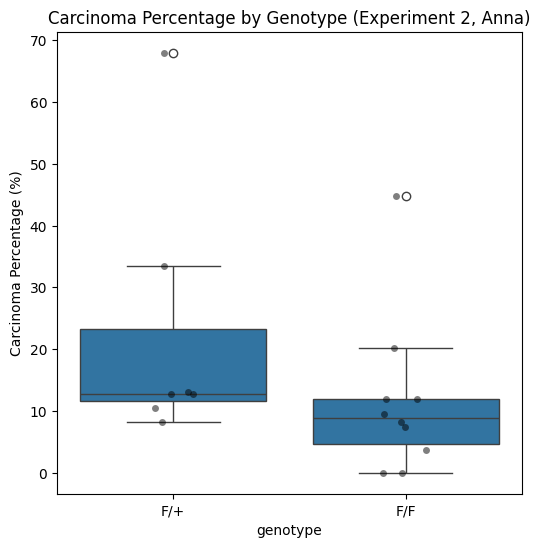

In [31]:
#make boxplot of carcinoma percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

#drop rows where area is zero
#make boxplot of carcinoma percentage by genotype
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='car_percentage_anna', data=results)
sns.stripplot(x='genotype', y='car_percentage_anna', data=results, 
              color='black', alpha=0.5)  # optional jittered points

plt.title("Carcinoma Percentage by Genotype (Experiment 2, Anna)")
plt.ylabel("Carcinoma Percentage (%)")  
plt.show()

In [32]:
#seeing if results are statistically different
from scipy.stats import mannwhitneyu

# Split groups
group_fplus = results[results["genotype"] == "F/+"]["car_percentage_anna"]
group_ff = results[results["genotype"] == "F/F"]["car_percentage_anna"]

stat, p = mannwhitneyu(group_fplus, group_ff, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")  

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")

Mann-Whitney U test statistic: 54.0
P-value: 0.07083677658196276
Not statistically significant


# Getting Graph of IOUs + Other % comaparisons for ALL Overlapping slides

In [ ]:
import pandas as pd
import slideflow as sf

#update to also track % grayson's and anna's dysplasia that overlaps with each other 

#create output datafrae that will store the iou for each slide
results = pd.DataFrame(columns=["slide", "iou"])

dysplasia_labels = {"dysplasia", "mild", "moderate", "severe"}

grayson_dir = "/home/stanna/labshare/PROJECTS/PDCD10/rois/grayson"
#updated to use new csvs
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/rois_csvs"

#grayson directory has the slides they BOTH labeled 
for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        print("current csv file: ", csv_file)
        base_name = csv_file.replace(".csv", "")

        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue
        
        svs_path = svs_map[base_name]
        grayson_csv = os.path.join(grayson_dir, csv_file)
        anna_csv =  os.path.join(anna_dir, csv_file)

        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
        #if Anna's object doesn't load, skip this slide
        try:
            wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)
        except:
            print(f"Anna Object didn't load for {base_name}, skipping.")
            continue

        dys_union_grayson = get_dysplasia_union(wsi_grayson, dysplasia_labels, area_threshold=0)
        dys_union_anna = get_dysplasia_union(wsi_anna, dysplasia_labels, area_threshold=0)

        intersection_area, iou, dice = compute_overlap_metrics(dys_union_grayson, dys_union_anna)

        dys_area_grayson = dys_union_grayson.area
        dys_area_anna = dys_union_anna.area

        #Percentage of Grayson's dysplasia that is also annotated by Anna
        #(Tells us how much Anna agrees with Grayson's annotations)
        if dys_area_grayson > 0:    
            percentage_grayson_covered = (intersection_area / dys_area_grayson) * 100
        else:
            percentage_grayson_covered = 0

        #Percentage of Anna's dysplasia that is also annotated by Grayson
        #(Tells us how much Grayson agrees with Anna's annotations)
        if dys_area_anna > 0:   
            percentage_anna_covered = (intersection_area / dys_area_anna) * 100 
        else:
            percentage_anna_covered = 0


        #output to dataframe 
        new_result = pd.DataFrame({
            "slide": [base_name],
            "iou": [iou],
            "percentage_grayson_covered": [percentage_grayson_covered],
            "percentage_anna_covered": [percentage_anna_covered]    
        })

        #add new result to results dataframe
        results = pd.concat([results, new_result], ignore_index=True)

In [ ]:
#checked and saw that zero meant that there was no dysplasia labelled, so we will drop the zeros
print(results)


In [ ]:
results = results[results["iou"] != 0]
median_iou = results["iou"].median()
print(f"Results:\n{results}\n")
print(f"Median IOU: {median_iou}")
print(results["slide"].count())


In [ ]:
overlapping_slides = results["slide"].tolist()
print(overlapping_slides)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Sort the results by IOU value
results_sorted = results.sort_values('iou', ascending=True)

# Create a figure for the plot
plt.figure(figsize=(10, 6))  # Doubled width to 20

# Create a horizontal bar graph for slides and iou
sns.barplot(y='slide', x='iou', data=results_sorted, palette='viridis')

# Set the title and labels
plt.title("Distribution of IOU Across Labelled Slides")
plt.ylabel("Slide")
plt.xlabel("IOU")

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Sort the results by % grayson's dysplasia that is also annotated by Anna
results_sorted = results.sort_values('percentage_grayson_covered', ascending=True)

# Create a figure for the plot
plt.figure(figsize=(10, 6))  # Doubled width to 20

# Create a horizontal bar graph for slides and iou
sns.barplot(y='slide', x='percentage_grayson_covered', data=results_sorted, palette='viridis')

# Set the title and labels
plt.title("Distribution of % Grayson's Dysplasia that is also Annotated by Anna")
plt.ylabel("Slide")
plt.xlabel("% Grayson's Dysplasia that is also Annotated by Anna")

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [ ]:
#Do same thing for Anna's percentage of Grayson's dysplasia that is also annotated by her   

import seaborn as sns
import matplotlib.pyplot as plt 

# Sort the results by % grayson's dysplasia that is also annotated by Anna
results_sorted = results.sort_values('percentage_anna_covered', ascending=True)

# Create a figure for the plot
plt.figure(figsize=(10, 6))  # Doubled width to 20

# Create a horizontal bar graph for slides and iou
sns.barplot(y='slide', x='percentage_anna_covered', data=results_sorted, palette='viridis')

# Set the title and labels
plt.title("Distribution of % Anna's Dysplasia that is also Annotated by Grayson")
plt.ylabel("Slide")
plt.xlabel("% Anna's Dysplasia that is also Annotated by Grayson")

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# Centerline Analysis

In [ ]:
# Load and process ROI data from CSV
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/home/stanna/labshare/PROJECTS/PDCD10/rois/grayson/AF110F.csv"
df = pd.read_csv(csv_path)

# Group points by ROI name and create polygons
roi_polygons = {}
for roi_name, group in df.groupby("roi_name"):
    # Convert coordinates to (x, y) tuples
    points = list(zip(group["x_base"], group["y_base"]))
    roi_polygons[roi_name] = Polygon(points)

# Display polygon information
for roi, poly in roi_polygons.items():
    print(f"ROI {roi}: Area = {poly.area}, Length = {poly.length}")


# Visualizing Voronoi Graphs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString, Point
from shapely.ops import unary_union
from scipy.spatial import Voronoi, voronoi_plot_2d

# Select an example ROI polygon
roi_polygon = roi_polygons["ROI_2"]  # Replace with different ROI if needed

# Extract boundary points from the polygon
boundary_coords = np.array(roi_polygon.exterior.coords)

# Compute Voronoi diagram from boundary points
vor = Voronoi(boundary_coords)
fig = voronoi_plot_2d(vor)
plt.title("Voronoi Graph")
plt.show()

#get the vertices that define the regions
vor_vertices = vor.vertices


# Graph based with changes made into functions

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString, Point
from shapely.ops import unary_union
from scipy.spatial import Voronoi
import pandas as pd
import os
import slideflow as sf

# --------------------------
# 1) Percentile-based Trim
# --------------------------
def trim_ends_by_percentile(centerline, polygon, low_pct=10):
    """
    Trims centerline points whose distance to polygon boundary
    is below the `low_pct` percentile of all distances.
    This automatically adapts to different ROI shapes & sizes.
    """
    if not centerline or not len(centerline.coords):
        return None

    coords = list(centerline.coords)

    # 1. Compute distance to boundary for all points
    #same size as the coords list and first entry here corresponds to the distance of the first point in coords to the boundary, etc. 
    #This allows us to ip the two lists together and then filter based on the distance later on
    dists = [polygon.exterior.distance(Point(pt)) for pt in coords]

    # 2. Determine cutoff using low percentile
    # so if it's 10 it means cutoff is 10th percentile of distances 
    # (idea is that the points with the smallest distances to boundary are the "tails" we noticed that aren't part of the true centerline )
    cutoff = np.percentile(dists, low_pct)

    # 3. Keep only points with distance >= cutoff
    new_coords = [pt for pt, dist in zip(coords, dists) if dist >= cutoff]

    # 4. Rebuild centerline
    if len(new_coords) < 2:
        return None
    return LineString(new_coords)

In [43]:
# Convert to graph
def medial_axis_to_graph(medial_axis):
    G = nx.Graph()
    if isinstance(medial_axis, MultiLineString):
        for line in medial_axis.geoms:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                #the weight is the distance between the two points
                seg_length = Point(coords[i]).distance(Point(coords[i+1]))
                G.add_edge(coords[i], coords[i+1], weight=seg_length)
    elif isinstance(medial_axis, LineString):
        coords = list(medial_axis.coords)
        for i in range(len(coords) - 1):
            seg_length = Point(coords[i]).distance(Point(coords[i+1]))
            G.add_edge(coords[i], coords[i+1], weight=seg_length)
    return G

In [44]:


def find_longest_path(G_largest):
    #iterating through all nodes and keeping the ones with degree 1 (terminal nodes)
    print("finding terminal nodes")
    terminal_nodes = [n for n in G_largest.nodes if G_largest.degree[n] == 1]
    #print number of terminal nodes
    print(f"number of terminal nodes: {len(terminal_nodes)}")
    if len(terminal_nodes) < 2:
        return None

    max_length = 0
    best_pair = None
    #double loop tof find distance between each pair of terminal nodes
    #two terminal nodes that are furthest apart should represent the centerline
    print("finding longest path")
    for i in range(len(terminal_nodes)):
        for j in range(i+1, len(terminal_nodes)):
            try:
                path_length = nx.shortest_path_length(
                    G_largest, terminal_nodes[i], terminal_nodes[j], weight="weight"
                )
                if path_length > max_length:
                    max_length = path_length
                    #update best pair to this one with the longest distance
                    best_pair = (terminal_nodes[i], terminal_nodes[j])
            except nx.NetworkXNoPath:
                pass

    if not best_pair:
        return None
    #returns the longest path between the two terminal nodes
    return nx.shortest_path(G_largest, source=best_pair[0], target=best_pair[1], weight="weight")

In [45]:
#alternative maybe faster way of getting longest path using dijkstra's algorithm 
def find_weighted_diameter_path(G):
    # 1) Pick an arbitrary node
    start = next(iter(G.nodes))
    # 2) Dijkstra from start to get all distances
    dist1, _ = nx.single_source_dijkstra(G, start, weight="weight")
    # 3) Find farthest node from start
    u = max(dist1, key=dist1.get)
    # 4) Dijkstra from u to get distances & predecessors
    dist2, paths = nx.single_source_dijkstra(G, u, weight="weight")
    # 5) Find farthest node from u
    v = max(dist2, key=dist2.get)
    # 6) The path from u to v is the diameter
    #now we actually use the path dictionary and return the path from u to v
    return paths[v]


In [46]:
def process_wsi(wsi):
    """Process WSI object to extract centerline lengths for dysplasia ROIs."""
    mpp = wsi.mpp
    polygons = []
    centerline = None
    
    # Collect dysplasia polygons
    for roi in wsi.rois:
        if roi.label and roi.poly.geom_type == "Polygon" and roi.label.lower() in ['mild', 'moderate', 'severe', 'dysplasia']:
            print("Processing label:", roi.label)
            polygons.append(roi.poly)
        elif roi.poly.geom_type == "MultiPolygon":
            print("MultiPolygon found for ROI")
            if roi.label and roi.label.lower() in ['mild', 'moderate', 'severe', 'dysplasia']:
                for poly in roi.poly.geoms:
                    polygons.append(poly)
            else:
                print(f"Unknown label: {roi.label} for MultiPolygon ROI")
        else:
            print(f"Unknown geometry type: {roi.poly.geom_type} for ROI with label {roi.label}")
            continue

    # Process each ROI to extract centerline
    centerline_lengths = []
    for roi_polygon in polygons:
        # Extract boundary points
        boundary_coords = np.array(roi_polygon.exterior.coords)

        # Compute Voronoi diagram
        vor = Voronoi(boundary_coords)

        # Filter Voronoi edges inside the polygon
        valid_lines = []
        for vpair in vor.ridge_vertices:
            if -1 in vpair:  
                continue
            p1, p2 = vor.vertices[vpair[0]], vor.vertices[vpair[1]]
            line = LineString([p1, p2])
            if roi_polygon.contains(line):
                valid_lines.append(line)

        # Merge edges into medial axis
        medial_axis = unary_union(valid_lines)
        G = medial_axis_to_graph(medial_axis)

        if G.number_of_nodes() == 0:
            print("Graph is empty — skipping this ROI.")
            continue

        # Find largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        G_largest = G.subgraph(largest_cc).copy()

        # Find longest path using Dijkstra's algorithm
        longest_path = find_weighted_diameter_path(G_largest)
        
        if longest_path:
            centerline = LineString(longest_path)
        else:
            centerline = None

        # Apply percentile-based trimming
        if centerline:
            centerline = trim_ends_by_percentile(centerline, roi_polygon, low_pct=10)

        # Store centerline length
        if centerline and len(centerline.coords) > 1:
            print("Centerline Length (after percentile trim):", centerline.length)
            centerline_lengths.append(centerline.length)

    # Calculate total centerline length
    total_centerline_length = sum(centerline_lengths)
    print("Total Centerline Length:", total_centerline_length)

    # Visualize centerline (optional)
    if centerline and len(centerline.coords) > 1:
        fig, ax = plt.subplots(figsize=(8, 6))
        x, y = roi_polygon.exterior.xy
        ax.plot(x, y, linestyle="-", color="blue", label="ROI Boundary")

        cx, cy = centerline.xy
        ax.plot(cx, cy, linestyle="--", color="red", linewidth=2, label="Refined Centerline")

        plt.xlabel("X-coordinates")
        plt.ylabel("Y-coordinates")
        plt.title(f"Final Centerline with Percentile-based Trimming ({wsi.name})")
        plt.legend()
        plt.show()

    # Convert to microns
    total_centerline_length_microns = total_centerline_length * mpp
    return total_centerline_length_microns
        

        


In [47]:
#new method that gets dysplasia percentage useing centerline method
#note how this loops through all ROIs and gets two different litsts on of all centerline lengths and other of just dysplasia centerline lengths

from shapely.geometry import Polygon, MultiPolygon, LineString, Point
from shapely.ops import unary_union
from scipy.spatial import Voronoi
import numpy as np
import networkx as nx

def process_wsi_percentage(wsi, low_pct=10):
    mpp = wsi.mpp

    # collect all labels on this slide (lowercased)
    labels_all = { (roi.label or "").lower() for roi in wsi.rois if roi.poly }

    # if there’s no dysplasia at all, we can short‑circuit
    dys_labels = {"dysplasia","mild","moderate","severe"}
    if not (labels_all & dys_labels):
        # no dysplasia on this slide → 0%.
        print("no dysplasia on this slide")
        return 0.0, 0.0, 0.0
    # two lists for centerline lengths (in px)
    total_lengths = []
    dys_lengths   = []

    
    for roi in wsi.rois:
        # only polygons or multipolygons
        poly = roi.poly
        if not poly or not hasattr(poly, "geom_type"):
            continue
        
        label = (roi.label or "").lower()
        if poly.geom_type == "Polygon":
            polys = [poly]
        elif poly.geom_type == "MultiPolygon":
            polys = list(poly.geoms)
        else:
            continue
        
        # only keep the ROIs that are *epithelium* (either benign or dysplasia)
        if label not in dys_labels and label != "benign":
            continue
        
        for P in polys:
            # --- compute one centerline for P exactly like before ---
            boundary_coords = np.array(P.exterior.coords)
            vor = Voronoi(boundary_coords)
            lines = []
            for vpair in vor.ridge_vertices:
                if -1 in vpair: continue
                a, b = vor.vertices[vpair]
                L = LineString([a,b])
                if P.contains(L):
                    lines.append(L)
            medial = unary_union(lines)
            G = medial_axis_to_graph(medial)
            if G.number_of_nodes()==0:
                continue
            
            # pick the largest connected component...
            cc = max(nx.connected_components(G), key=len)
            Gsub = G.subgraph(cc).copy()
            
            # ...find its diameter path using dijkstra's algorithm
            path = find_weighted_diameter_path(Gsub) 
            if not path:
                continue
            cent = LineString(path)
            
            # finally trim the tails
            cent = trim_ends_by_percentile(cent, P, low_pct=low_pct)
            if not cent or len(cent.coords)<2:
                continue
            
            length = cent.length
            total_lengths.append(length)
            if label in dys_labels:
                dys_lengths.append(length)
    
    total_px = sum(total_lengths)
    dys_px   = sum(dys_lengths)
    
    if total_px == 0:
        return 0.0, 0.0, 0.0
    
    # convert to microns
    total_um = total_px * mpp
    dys_um   = dys_px   * mpp
    
    pct = 100*(dys_um/total_um)
    
    return dys_um, total_um, pct


# Centerline Lengths for Overlapping Slides

In [ ]:
#make sure you are running for all csvs in Grayon not just the base names list below

results_centerline = pd.DataFrame(columns=["slide", "anna_centerline_length", "grayson_centerline_length"])

grayson_dir = "/home/stanna/labshare/PROJECTS/PDCD10/rois/grayson"
#updated to use new csvs
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/rois_csvs"

#grayson directory has the slides they BOTH labeled 
#start by only running on these 10 base names: 
#before running remove base names run on all overlapping slides!
# base_names = ["AF102F", "AH141F", "AF252", "AG991M", "AH073M","AF135M", "AG985F", "AF238F", "AF113M", "AF136M"]
for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        print("current csv file: ", csv_file)
        base_name = csv_file.replace(".csv", "")
        if base_name not in svs_map or base_name not in overlapping_slides:
            print(f"not running {base_name}, skipping.")
            continue

        svs_path = svs_map[base_name]
        grayson_csv = os.path.join(grayson_dir, csv_file)
        anna_csv =  os.path.join(anna_dir, csv_file)

        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
        wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)

        #get centerline length for each wsi object
        print("processing anna")
        anna_centerline_length = process_wsi(wsi_anna)
        print("processing grayson")
        grayson_centerline_length = process_wsi(wsi_grayson)

        #store in df
          #output to dataframe 
        new_result = pd.DataFrame({
            "slide": [base_name],
            "anna_centerline_length": [anna_centerline_length],
            "grayson_centerline_length": [grayson_centerline_length]
        })
        results_centerline = pd.concat([results_centerline, new_result], ignore_index=True)




In [ ]:
print(results_centerline)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(results_centerline["anna_centerline_length"], results_centerline["grayson_centerline_length"])
print(f"R-squared (R2) value: {r2}")

In [ ]:
# Create bar graph comparing centerline lengths
plt.figure(figsize=(20, 6))
plt.bar(results_centerline["slide"], results_centerline["anna_centerline_length"], label="Anna")
plt.bar(results_centerline["slide"], results_centerline["grayson_centerline_length"], label="Grayson")
plt.xlabel("Slide")
plt.ylabel("Centerline Length (microns)")
plt.title("Dysplasia Centerline Lengths for Overlapping Slides")
plt.legend()




# Centerline Method Across Genotypes (Percentage Analysis)

In [ ]:
# Analyze centerline percentages by genotype for Grayson's annotations
import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

# Load genotype information
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")

# Initialize results dataframe
results_pct = pd.DataFrame(columns=["slide", "total_dys_percentage", "genotype"])

# Process Grayson's Experiment 1 annotations
grayson_dir = "/home/stanna/Cancer_Project_2025/Grayson/Exp1"

for csv_file in os.listdir(grayson_dir):
    if csv_file.endswith(".csv"):
        print("Processing:", csv_file)
        base_name = csv_file.replace(".csv", "")
        
        # Check if slide file exists
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue

        # Skip problematic slide
        if base_name == "AG039F":
            continue
      
        svs_path = svs_map[base_name]

        # Get genotype information
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Create WSI object
        grayson_csv = os.path.join(grayson_dir, csv_file)
        wsi_grayson = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=grayson_csv)
        
        # Calculate centerline percentage
        dys_len, total_len, grayson_centerline_percentage = process_wsi_percentage(wsi_grayson)

        # Store results
        new_result = pd.DataFrame({
            "slide": [base_name],
            "total_dys_percentage": [grayson_centerline_percentage],
            "genotype": [genotype]
        })

        results_pct = pd.concat([results_pct, new_result], ignore_index=True)

In [ ]:
results_pct

In [ ]:
# Create boxplot of centerline-based dysplasia percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot with individual points
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='total_dys_percentage', data=results_pct)
sns.stripplot(x='genotype', y='total_dys_percentage', data=results_pct, 
              color='black', alpha=0.5)

plt.title("Dysplasia Percentage by Genotype using Centerline Method (Experiment 1, Grayson)")
plt.ylabel("Dysplasia Percentage (Centerline Method)")
plt.show()

In [ ]:
# Test for statistical significance between genotypes
from scipy.stats import mannwhitneyu

# Split data by genotype
group_fplus_new = results_pct[results_pct["genotype"] == "F/+"]["total_dys_percentage"]
group_ff_new = results_pct[results_pct["genotype"] == "F/F"]["total_dys_percentage"]

# Run Mann-Whitney U test
stat, p = mannwhitneyu(group_fplus_new, group_ff_new, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")
    

In [ ]:
# Analyze centerline percentages by genotype for Anna's annotations
import pandas as pd
import matplotlib.pyplot as plt 
import slideflow as sf
import os

# Load genotype information
genotype_df = pd.read_csv("/home/stanna/Cancer_Project_2025/tracking.csv")

# Initialize results dataframe
results2_pct = pd.DataFrame(columns=["slide", "total_dys_percentage", "genotype"])

# Process Anna's Experiment 2 annotations
anna_dir = "/home/stanna/Cancer_Project_2025/Anna/exp2"

for csv_file in os.listdir(anna_dir):
    if csv_file.endswith(".csv"):
        print("Processing:", csv_file)
        base_name = csv_file.replace(".csv", "")
        
        # Check if slide file exists
        if base_name not in svs_map:
            print(f"No .svs file found for {base_name}, skipping.")
            continue

        # Skip problematic slide
        if base_name == "AG039F":
            continue
      
        svs_path = svs_map[base_name]

        # Get genotype information
        if base_name not in genotype_df["slide"].values:
            print(f"No genotype information found for {base_name}, skipping.")
            continue
        genotype = genotype_df.loc[genotype_df["slide"] == base_name, "genotype"].values[0]
        
        # Create WSI object
        anna_csv = os.path.join(anna_dir, csv_file)
        wsi_anna = sf.WSI(path=svs_path, tile_px=256, tile_um=128, rois=anna_csv)
        
        # Calculate centerline percentage
        dys_len, total_len, anna_centerline_percentage = process_wsi_percentage(wsi_anna)

        # Store results
        new_result = pd.DataFrame({
            "slide": [base_name],
            "total_dys_percentage": [anna_centerline_percentage],
            "genotype": [genotype]
        })

        results2_pct = pd.concat([results2_pct, new_result], ignore_index=True)


In [ ]:
results2_pct

In [ ]:
# Create boxplot of centerline-based dysplasia percentage by genotype
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot with individual points
plt.figure(figsize=(6, 6))
sns.boxplot(x='genotype', y='total_dys_percentage', data=results2_pct)
sns.stripplot(x='genotype', y='total_dys_percentage', data=results2_pct, 
              color='black', alpha=0.5)

plt.title("Dysplasia Percentage by Genotype using Centerline Method (Experiment 2, Anna)")
plt.ylabel("Dysplasia Percentage (Centerline Method)")
plt.show()

In [ ]:
# Test for statistical significance between genotypes
from scipy.stats import mannwhitneyu

# Split data by genotype
group_fplus_new = results2_pct[results2_pct["genotype"] == "F/+"]["total_dys_percentage"]
group_ff_new = results2_pct[results2_pct["genotype"] == "F/F"]["total_dys_percentage"]

# Run Mann-Whitney U test
stat, p = mannwhitneyu(group_fplus_new, group_ff_new, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Statistically significant difference")
else:
    print("Not statistically significant")